<a href="https://colab.research.google.com/github/yakshika14/CGMT-Project/blob/main/Digit_Recognition_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numpy Python library is used for including any type of mathematical operation in the code. It is the fundamental package for scientific calculation in Python. It also supports to add large, multidimensional arrays and matrices. The second library is matplotlib, which is a Python 2D plotting library, and with this library, we need to import a sub-library pyplot. This library is used to plot any type of charts in Python for the code. 

The last library is the Pandas library, which is one of the most famous Python libraries and used for importing and managing the datasets. It is an open-source data manipulation and analysis library. It will be imported as below:

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. 

In [ ]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [ ]:
#Mount Google drive to save model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset
Load the training and testing MNIST images into the variables X_train and X_test, with y_train and y_test used to hold the matching digits. Keep in mind that the shape of every image in the MNIST dataset is 28 x 28 pixels.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

Reshape the inputs (X_train and X_test) to a shape that can be an input for the ANN model. The Keras reshape function takes as arguments the number of images (60,000 for X_train and 10,000 for X_test), the shape of each image (28×28), and the number of color channels – 1 in this case because images are greyscale.

Then, one-hot-encode the target variable, mapping a variable to each target label – in our case, ‘0’, ‘1’, ‘2’, etc. because we are recognizing digits.

In [ ]:
#from keras import utils as np_utils
from keras.utils import np_utils
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)


Number of images in training Set:  60000
Number of images in training Set:  10000
Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


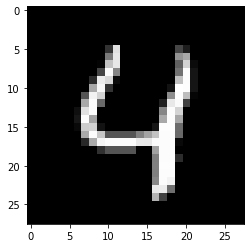

In [ ]:

plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print("Label:",y_test[4:5])

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


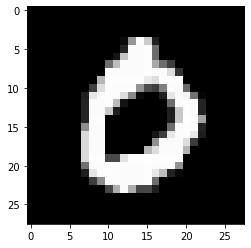

In [ ]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print("Label:",y_test[3:4])

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# NN Model structure
from keras.models import Sequential
from keras.layers import Dense

first_layer_size = 100
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


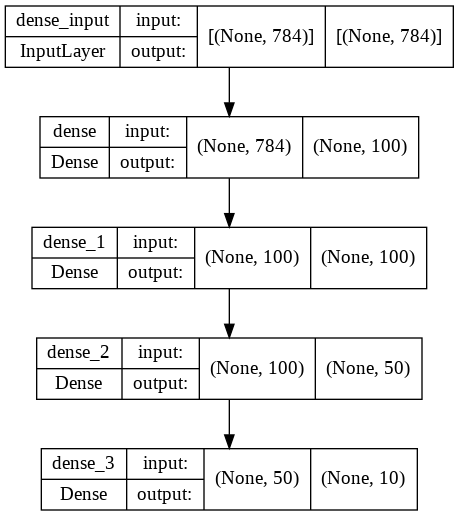

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

Shape of First Layer (784, 100)
Visualization of First Layer


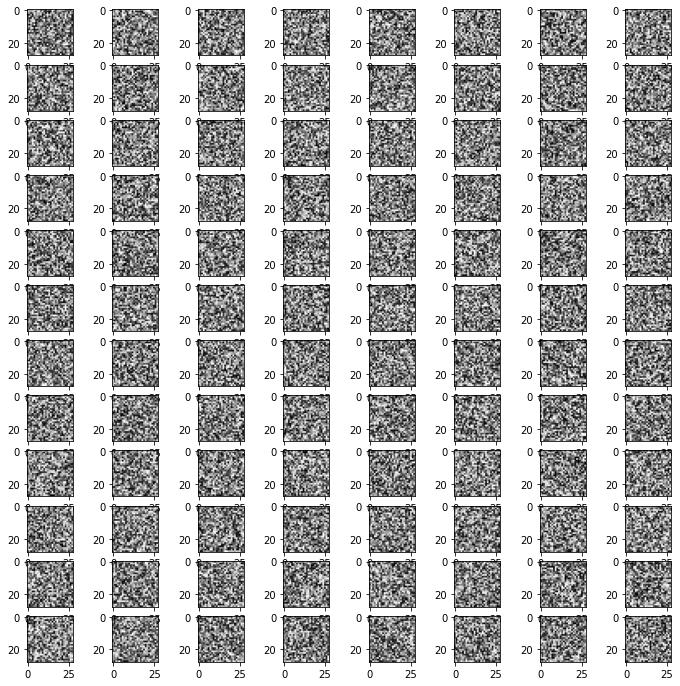

In [ ]:
#Weights before training
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#Model compilation
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:



In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/25
469/469 [==============================] - 5s 5ms/step - loss: 0.3372 - accuracy: 0.9020
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1370 - accuracy: 0.9592
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9701
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9766
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9837
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0437 - accuracy: 0.9870
Epoch 8/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0356 - accuracy: 0.9888
Epoch 9/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 10/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9916

In [ ]:
# save model and architecture to single file
model.save('/content/drive/My Drive/FDP/MNISTANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________
Saved model to disk


In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/FDP/MNISTANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


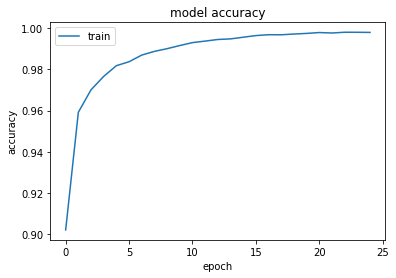

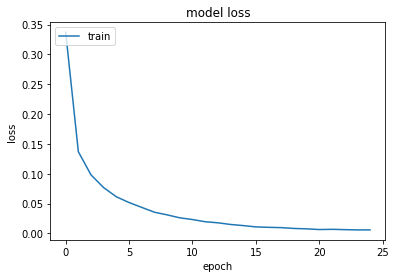

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
313/313 [==============================] - 1s 3ms/step - loss: 0.1619 - accuracy: 0.9772
Test Accuracy: 97.71999716758728


In [ ]:
#Trainig accuracy
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [ ]:
# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Confusion matrix 
[[5921    0    0    0    0    0    0    0    2    0]
 [   0 6740    0    0    0    0    0    0    2    0]
 [   1    1 5941    9    0    1    0    1    4    0]
 [   1    0    0 6120    0    7    0    0

In [ ]:
# testing accuracy
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[7 2 1 ... 4 5 6]
(10000,)


In [ ]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix 
[[ 966    1    1    2    1    2    2    1    2    2]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   4    2 1000    4    1    0    3    8   10    0]
 [   0    0    2  989    1   10    0    3

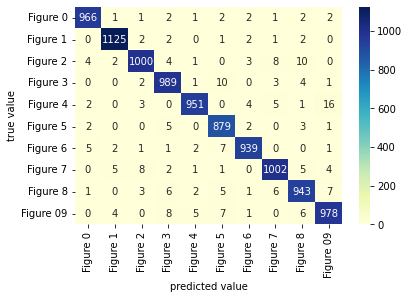

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

Shape of First Layer (784, 100)
Visualization of First Layer


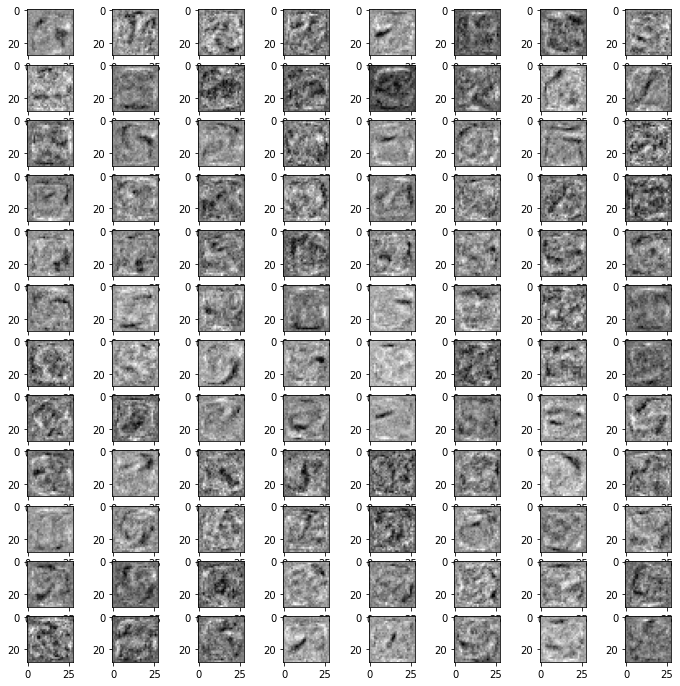

In [ ]:
# Weights after training of First layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1619361788034439
Test accuracy: 0.9771999716758728


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


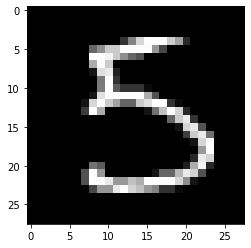

In [ ]:
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [1.2025008e-28 3.8685654e-20 1.8044690e-24 3.3210382e-11 3.3081469e-30
 1.0000000e+00 1.8168900e-22 1.4275234e-24 4.5803381e-18 4.7330018e-19]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


In [ ]:
from google.colab import files
uploaded = files.upload()
input=list(uploaded.keys())
input=input[0]



Saving img_1.jpg to img_1.jpg


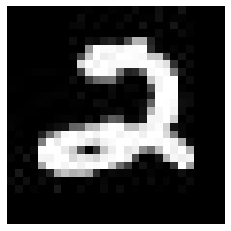

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread(input, cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

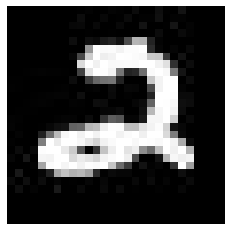

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print(prediction)
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Prediction Score:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit: 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Streamlit is an open source app framework in Python language. It helps us create web apps for data science and machine learning in a short time. It is compatible with major Python libraries such as scikit-learn, Keras, PyTorch, SymPy(latex), NumPy, pandas, Matplotlib

In [ ]:
!pip install streamlit

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
     |████████████████████████████████| 164 kB 45.1 MB/s 
     |████████████████████████████████| 111 kB 46.6 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 4.3 MB 37.7 MB/s 
     |████████████████████████████████| 181 kB 40.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 50.9 MB/s 
     |████████████████████████████████| 793 kB 41.2 MB/s 
     |████████████████████████████████| 428 kB 50.3 MB/s 
     |████████████████████████████████| 130 kB 52.2 MB/s 
     |████████████████████████████████| 381 kB 50.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c2c4e0c9ca98cb24bc16fbcfe1e976f64fc8aa2bc6bf5b514ba4e2ec599a6c9d
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: 

Ngrok is a cross-platform application that exposes local server ports to the Internet. 

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 745 kB 5.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=eb58f3a1ac3933a41a30587574e231233361c0977bae652f597f3a89e7c817f6
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/FDP/MNISTANN.h5')

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Workshop on  </p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">“Artificial Intelligence & Data Science MasterClasses ”</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Digit Recognition
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
   
  image_resized = cv2.resize(image_data, (28, 28))  
  prediction = model.predict(image_resized.reshape(1,784))
  print('Prediction Score:\n',prediction[0])
  thresholded = (prediction>0.5)*1
  print('\nThresholded Score:\n',thresholded[0])
  print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])
  digit = np.where(thresholded == 1)[1][0]
  #st.image(image_data, use_column_width=True)
  return digit
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Digit"):
  result=import_and_predict(image)
  st.success('Model has predicted the image is of  {}'.format(result))
if st.button("About"):
  st.header(" Deepak Moud")
  st.subheader("Assistant Professor, Department of Computer Engineering")
  
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:20px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://15a9-35-188-198-4.ngrok.io" -> "http://localhost:80">

In [ ]:
 !streamlit run --server.port 80 app.py

2022-04-21 10:12:08.364 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.188.198.4:80

2022-04-21 10:12:24.252447: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Prediction Score:
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Thresholded Score:
 [1 0 0 0 0 0 0 0 0 0]

Predicted Digit: 0


In [ ]:
ngrok.kill()